In [124]:
#importing required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from datetime import date, datetime

In [125]:
#feeding in csv path with global land temp data from all countries measured monthly since 1743.
csv_path = "GlobalLandTemperaturesByCountry.csv"
country_temps = pd.read_csv(csv_path)
country_temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [126]:
#use count to check for missing entries
country_temps.count()

dt                               577462
AverageTemperature               544811
AverageTemperatureUncertainty    545550
Country                          577462
dtype: int64

In [127]:
#check data types
country_temps.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [128]:
#find column names
country_temps = pd.DataFrame(country_temps) 
country_temps.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [129]:
#renaming columns
country_temps = country_temps.rename(columns={"dt": "Reading Date", "AverageTemperature":"Temperature", "AverageTemperatureUncertainty": "Average Temperature Uncertainty", "Country": "Country"})

country_temps.head(10)

,Reading Date,Temperature,Average Temperature Uncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [130]:
#Removes lines without temp. readings

dropna_country_temps = country_temps.dropna(subset=['Temperature'])
dropna_country_temps.head(10)

,Reading Date,Temperature,Average Temperature Uncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
10,1744-09-01,11.702,1.517,Åland
11,1744-10-01,5.477,1.862,Åland
12,1744-11-01,3.407,1.425,Åland
13,1744-12-01,-2.181,1.641,Åland
14,1745-01-01,-3.850,1.841,Åland


In [131]:
#all the columns have the same amount of data!

dropna_country_temps.count()

Reading Date                       544811
Temperature                        544811
Average Temperature Uncertainty    544811
Country                            544811
dtype: int64

In [132]:
#listing out names of countries w temp recordings
dropna_country_temps.Country.unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [133]:
#indexing data by country name
df = dropna_country_temps.set_index("Country")
df

,Reading Date,Temperature,Average Temperature Uncertainty
Country,,,
Åland,1743-11-01,4.384,2.294
Åland,1744-04-01,1.530,4.680
Åland,1744-05-01,6.702,1.789
Åland,1744-06-01,11.609,1.577
Åland,1744-07-01,15.342,1.410
...,...,...,...
Zimbabwe,2013-04-01,21.142,0.495
Zimbabwe,2013-05-01,19.059,1.022
Zimbabwe,2013-06-01,17.613,0.473


In [134]:
#removes dashes from dates and converts them to int
dasheddates = df["Reading Date"]

df["Reading Date"] = df["Reading Date"].replace('-', '', regex=True)


df["Reading Date"] = df["Reading Date"].astype(int)

df.dtypes

Reading Date                         int64
Temperature                        float64
Average Temperature Uncertainty    float64
dtype: object

In [135]:
#isolates data from 20 cacao bean growing nations that produced beans for the best rated chocolate bars, as determined in the previous jupyter notebook
df = df.loc[['Belize', 'Brazil', 'Ecuador', 'Ghana', 'Jamaica', 'Madagascar', 'Peru', 'Trinidad', 'Venezuela', 'Vietnam'], ["Reading Date", "Temperature"]]

df

,Reading Date,Temperature
Country,,
Belize,18250101.0,22.842
Belize,18250201.0,23.351
Belize,18250301.0,24.702
Belize,18250401.0,26.901
Belize,18250501.0,27.041
...,...,...
Vietnam,20130401.0,25.887
Vietnam,20130501.0,27.443
Vietnam,20130601.0,27.623


In [136]:
#finds all readings for our top countries after 2006 (which is the year of the first chocolate bar review in our other data set, our last review was written in 2017. Unfortunately, our weather data only goes to 2013 so we are effectively interpreting climate data from Jan 2006 to Sep 2013.)
daterange = df.loc[df["Reading Date"] <= 20130000]
daterange = daterange.loc[daterange["Reading Date"] > 19920000]
daterange

,Reading Date,Temperature
Country,,
Belize,19920101.0,23.148
Belize,19920201.0,23.801
Belize,19920301.0,25.898
Belize,19920401.0,26.671
Belize,19920501.0,26.403
...,...,...
Vietnam,20120801.0,27.373
Vietnam,20120901.0,26.095
Vietnam,20121001.0,25.091


In [137]:
#converting the reading dates into datetime type

pd.to_datetime(daterange["Reading Date"], format='%Y%m%d', errors='coerce')

daterange.head()

,Reading Date,Temperature
Country,,
Belize,19920101.0,23.148
Belize,19920201.0,23.801
Belize,19920301.0,25.898
Belize,19920401.0,26.671
Belize,19920501.0,26.403


In [138]:
daterange.dtypes

Reading Date    float64
Temperature     float64
dtype: object

In [139]:
daterange.groupby("Reading Date")
daterange

,Reading Date,Temperature
Country,,
Belize,19920101.0,23.148
Belize,19920201.0,23.801
Belize,19920301.0,25.898
Belize,19920401.0,26.671
Belize,19920501.0,26.403
...,...,...
Vietnam,20120801.0,27.373
Vietnam,20120901.0,26.095
Vietnam,20121001.0,25.091


In [140]:
#converts reading date to datetime format and separates out into years and months.
#renamed months to names and cleaned look of table

daterange['DateTime'] = daterange['Reading Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
daterange['Year'] = daterange['DateTime'].dt.year
daterange['Month'] = daterange['DateTime'].dt.month


#monthnames = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
#daterange = daterange.replace({"Month":monthnames})

del daterange["Reading Date"]

daterange.dtypes

Temperature           float64
DateTime       datetime64[ns]
Year                    int64
Month                   int64
dtype: object

In [141]:
#pivot table summarizes country temp. information by month, year

yearlyclimatedata =pd.pivot_table(daterange,values=['Temperature'],index=['Year'],columns=['Country'])
yearlyclimatedata.head()

Temperature                                                         \
Country      Belize     Brazil    Ecuador      Ghana    Jamaica Madagascar   
Year                                                                         
1992      25.647917  25.251333  22.611500  26.833250  26.720417  23.341333   
1993      25.603083  25.354917  22.421583  27.088917  26.523000  23.455833   
1994      25.908917  25.454667  22.217083  26.966083  26.911000  23.444583   
1995      26.004750  25.554417  22.574167  27.212250  26.893917  23.479750   
1996      25.450500  25.337833  22.032500  27.130833  26.474833  23.262917   

                                          
Country       Peru  Venezuela    Vietnam  
Year                                      
1992     20.836583  25.593333  23.851250  
1993     20.502500  25.468000  23.935667  
1994     20.530583  25.506500  24.159417  
1995     20.686000  25.921583  23.919000  
1996     20.115000  25.598500  23.749667

In [142]:
list(yearlyclimatedata.columns)

[('Temperature', 'Belize'),
 ('Temperature', 'Brazil'),
 ('Temperature', 'Ecuador'),
 ('Temperature', 'Ghana'),
 ('Temperature', 'Jamaica'),
 ('Temperature', 'Madagascar'),
 ('Temperature', 'Peru'),
 ('Temperature', 'Venezuela'),
 ('Temperature', 'Vietnam')]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


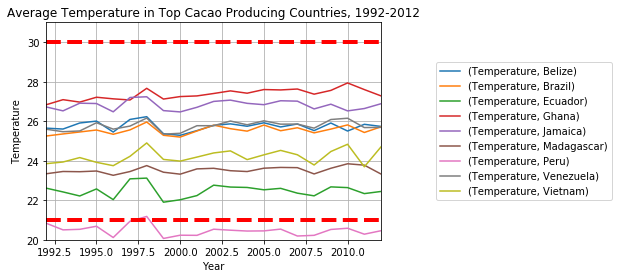

In [143]:
fig = yearlyclimatedata.plot()
ax = plt.subplot(111)

plt.xlabel("Year")
plt.ylabel("Temperature")
plt.ylim(20,31)

plt.axhline(y=30, color='r', linewidth=4, linestyle="dashed")
plt.axhline(y=21, color='r', linewidth=4, linestyle="dashed")

plt.title("Average Temperature in Top Cacao Producing Countries, 1992-2012")
plt.grid()
ax.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))

plt.savefig("YearlyTemps.png")
plt.show()

In [144]:
#pivot table summarizes country temp. information comparing each month every year
monthclimatedata =pd.pivot_table(daterange,values=['Temperature'],index=['Month'],columns=['Country'])
monthclimatedata

Temperature                                                         \
Country      Belize     Brazil    Ecuador      Ghana    Jamaica Madagascar   
Month                                                                        
1         22.920333  25.942905  22.774048  27.219095  25.102238  25.614952   
2         24.119714  25.914048  22.884190  29.070810  25.302619  25.669571   
3         25.459810  25.907286  22.989857  29.910905  25.809762  25.522000   
4         26.941571  25.489381  22.883571  29.167857  26.353190  24.314333   
5         27.762143  24.728667  22.805190  28.245333  27.209381  22.599952   
6         27.502667  24.168000  22.185095  26.735905  27.948048  20.587714   
7         27.035952  24.172571  21.783000  25.722667  28.189048  19.827286   
8         27.085333  25.228810  21.914476  25.283619  28.221190  20.737000   
9         27.001857  26.107333  22.210095  25.733619  27.924333  22.365810   
10        25.702857  26.413952  22.275238  26.604571  27.336381  23.848286   
11        24.226190  26.292143  22.484762  27.471714  26.673095  25.403000   
12        23.099905  26.113190  22.594048  27.126952  25.672524  25.747238   

                                          
Country       Peru  Venezuela    Vietnam  
Month                                     
1        21.000048  25.409190  19.558476  
2        21.052952  25.955810  20.933381  
3        21.115952  26.535238  22.977429  
4        20.758762  26.405762  25.428190  
5        20.199095  26.065857  26.843857  
6        19.488810  25.400048  27.448810  
7        19.239619  25.171190  27.178619  
8        19.907571  25.512571  26.854619  
9        20.435619  25.825190  25.980667  
10       20.674429  25.763238  24.421619  
11       20.983905  25.779143  22.609762  
12       20.880667  25.362667  20.348714

In [145]:
list(monthclimatedata.columns)

[('Temperature', 'Belize'),
 ('Temperature', 'Brazil'),
 ('Temperature', 'Ecuador'),
 ('Temperature', 'Ghana'),
 ('Temperature', 'Jamaica'),
 ('Temperature', 'Madagascar'),
 ('Temperature', 'Peru'),
 ('Temperature', 'Venezuela'),
 ('Temperature', 'Vietnam')]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


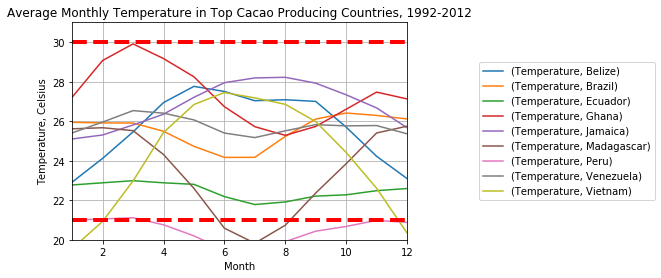

In [146]:
monthly = monthclimatedata.plot()
ax = plt.subplot(111)

plt.xlabel("Month")
plt.ylabel("Temperature, Celsius")
plt.title("Average Monthly Temperature in Top Cacao Producing Countries, 1992-2012")

plt.ylim(20,31)

plt.axhline(y=30, color='r', linewidth=4, linestyle="dashed")
plt.axhline(y=21, color='r', linewidth=4, linestyle="dashed")

plt.title("Average Monthly Temperature in Top Cacao Producing Countries, 1992-2012")
plt.grid()
ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

plt.savefig("MonthlyTemps.png")
plt.show()